# Sublevelset Filtrations

In [1]:
import time
import torch
import torch.nn as nn
import torch_tda
import numpy as np
import matplotlib.pyplot as plt
import bats

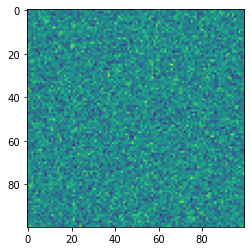

In [2]:
n = 100
img = np.random.randn(n,n)
f = img.flatten()
plt.imshow(img)

In [3]:
X = bats.LightFreudenthal(n,n)
D = torch_tda.nn.SublevelsetDiagram(X, maxdim=1, reduction_flags=(bats.standard_reduction_flag(), bats.clearing_flag()))

ft = torch.tensor(f, requires_grad=True)

In [4]:
optimizer = torch.optim.Adam([ft], lr=1e-1)

for i in range(20):
    optimizer.zero_grad()
    dgms = D(ft)
    loss = -torch.sum(dgms[1][:,1] - dgms[1][:,0])
    print(loss)
    loss.backward()
    optimizer.step()

tensor(-1280.7267, grad_fn=<NegBackward>)
tensor(-1544.8270, grad_fn=<NegBackward>)
tensor(-1804.7413, grad_fn=<NegBackward>)
tensor(-2059.8689, grad_fn=<NegBackward>)
tensor(-2309.8777, grad_fn=<NegBackward>)
tensor(-2556.6309, grad_fn=<NegBackward>)
tensor(-2800.6396, grad_fn=<NegBackward>)
tensor(-3042.1475, grad_fn=<NegBackward>)
tensor(-3280.5896, grad_fn=<NegBackward>)
tensor(-3516.6108, grad_fn=<NegBackward>)
tensor(-3750.8845, grad_fn=<NegBackward>)
tensor(-3982.3872, grad_fn=<NegBackward>)
tensor(-4214.0645, grad_fn=<NegBackward>)
tensor(-4444.1626, grad_fn=<NegBackward>)
tensor(-4672.3950, grad_fn=<NegBackward>)
tensor(-4900.1719, grad_fn=<NegBackward>)
tensor(-5125.9854, grad_fn=<NegBackward>)
tensor(-5350.6558, grad_fn=<NegBackward>)
tensor(-5574.4058, grad_fn=<NegBackward>)
tensor(-5797.8350, grad_fn=<NegBackward>)


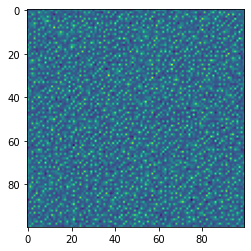

In [5]:
plt.imshow(ft.detach().numpy().reshape(100,100))